# FER-2013 code (expression recognition)

In [ ]:
# Step 1: Install Kaggle API (if not already installed)
!pip install -q kaggle

# Step 2: Upload kaggle.json (run this in an interactive environment like Colab)
from google.colab import files
uploaded = files.upload()  # Upload your kaggle.json file

# Step 3: Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

# Step 4: Download the FER2013 dataset
!kaggle datasets download -d msambare/fer2013

# Step 5: Extract the dataset
from zipfile import ZipFile
file_name = "fer2013.zip"
with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()
    print("Extraction Done!")

# Verify the extracted files
!ls  # Should show the extracted dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.17GB/s]
Extraction Done!
fer2013.zip  sample_data  test	train


In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

emotion_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001, decay=1e-6),
    metrics=['accuracy']
)

emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=5120// 64,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=1280 // 64
)


Epoch 1/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 69s 831ms/step - accuracy: 0.3458 - loss: 1.6878 - val_accuracy: 0.3586 - val_loss: 1.6508
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.3572 - loss: 1.6460 - val_accuracy: 0.4070 - val_loss: 1.6131
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 65s 811ms/step - accuracy: 0.3656 - loss: 1.6222 - val_accuracy: 0.3672 - val_loss: 1.6187
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.3672 - loss: 1.6177 - val_accuracy: 0.3805 - val_loss: 1.6089
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 66s 821ms/step - accuracy: 0.3783 - loss: 1.6122 - val_accuracy: 0.4141 - val_loss: 1.5635
Epoch 6/15
49/80 ━━━━━━━━━━━━━━━━━━━━ 23s 759ms/step - accuracy: 0.3935 - loss: 1.6070

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 507ms/step - accuracy: 0.3914 - loss: 1.6090 - val_accuracy: 0.3883 - val_loss: 1.5908
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 70s 873ms/step - accuracy: 0.3695 - loss: 1.6046 - val_accuracy: 0.4062 - val_loss: 1.5449
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 66s 832ms/step - accuracy: 0.4071 - loss: 1.5694 - val_accuracy: 0.4398 - val_loss: 1.5211
Epoch 9/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3852 - loss: 1.5718 - val_accuracy: 0.4008 - val_loss: 1.5524
Epoch 10/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.3995 - loss: 1.5627 - val_accuracy: 0.4070 - val_loss: 1.5496
Epoch 11/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4060 - loss: 1.5399 - val_accuracy: 0.4086 - val_loss: 1.5255
Epoch 12/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 515ms/step - accuracy: 0.4133 - loss: 1.5123 - val_accuracy: 0.4289 - val_loss: 1.4821
Epoch 13/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4132 - loss: 1.5179 - val_accuracy: 0.4352 - val_

In [ ]:
# Saving the model
emotion_model.save('emotion_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('emotion_model.h5')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    # Convert probabilities to percentage (optional)
    emotions_percent = [e * 100 for e in emotions]

    plt.bar(y_pos, emotions_percent, align='center', alpha=0.7, color='skyblue')
    plt.xticks(y_pos, objects)
    plt.ylabel('Percentage (%)')
    plt.title('Emotion Prediction')
    plt.ylim([0, 100])

    plt.show()


In [ ]:
import cv2

def facecrop(image_path):
    facedata = 'haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image_path)

    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces:
            sub_face = img[y:y+h, x:x+w]
            cv2.imwrite('capture.jfif', sub_face)
            print("✅ Face cropped and saved as capture.jpg")
            return True

        print("⚠️ No face detected.")
        return False

    except Exception as e:
        print("Error:", e)
        return False


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


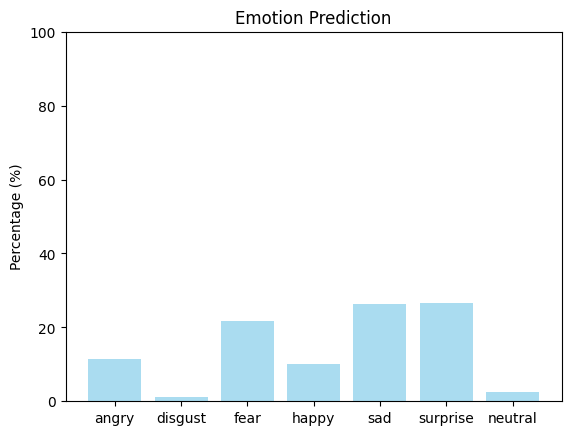

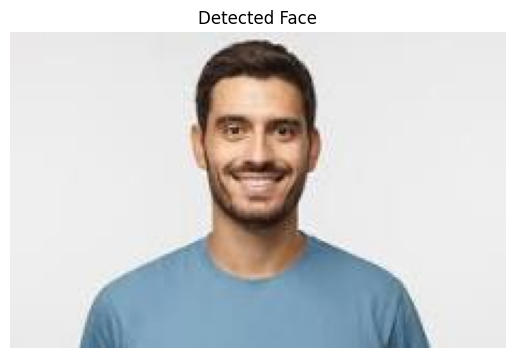

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Predict on the cropped face
file = 'capture.jfif'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0  # normalize

custom = emotion_model.predict(x)
emotion_analysis(custom[0])  # your bar chart function

# Show the cropped face
plt.imshow(true_image)
plt.axis('off')
plt.title("Detected Face")
plt.show()


In [ ]:
import tensorflow as tf

keras_model_path = '/content/emotion_model.h5'
model = tf.keras.models.load_model(keras_model_path)
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
tflite_model_name = 'emotion_model.tflite'
with open('emotion_model.tflite', 'wb') as f:
    f.write(tflite_model)
#This line will download the tflite file to our device
files.download('emotion_model.tflite')


Saved artifact at '/tmp/tmpfff9vrqv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  140613671754384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140613671754768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140613671755152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140613671754960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140613671751312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140613671756304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140613671755536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140613671756880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140613671752272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140613671758224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140613671757264: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>